# Julia: A Tool for Computational and Experimental Mathematics?
## Talk for 2020 REU: [Research Challenges of Computational and Experimental Mathematics](https://www.moravian.edu/mathematics/reu)

### [Jason M. Graham](https://sites.google.com/site/jasonmgrahamus/)
### [University of Scranton](https://www.scranton.edu/), [Department of Mathematics](https://www.scranton.edu/academics/cas/math/) 

#### [GitHub Repo](https://github.com/jmgraham30/JuliaCompExpMath)

## About Me

- Undergraduate degree in Mathematics 
- Masters degree in Computational and Applied Mathematics
- PhD in [Applied Mathematical and Computational Sciences](https://www.amcs.uiowa.edu/)
- Associate Professor in Mathematics 
- Research interests in mathematical, computational, and statistical modeling in biological systems 
- Mentor [MBI](https://mbi.osu.edu/) REU students at the [Swarm Lab at NJIT](https://www.theswarmlab.com/)

## Plan for the Talk
- Introduce Julia language and ecosystem as a potential tool for research in computational and experimental mathematics. 
   - To get started with Julia we recommend the [Julia Academy](https://juliaacademy.com/courses) Introduction to Julia course. Note that the downloadable notebooks are more up to date than the video lectures.  
   - Specifically, we will introduce [AbstractAlgebra.jl](https://nemocas.github.io/AbstractAlgebra.jl/latest/index.html), [BasicNT.jl](https://github.com/jmgraham30/BasicNT.jl), [DifferentialEquations.jl](https://docs.sciml.ai/stable/), [Distributions.jl](https://juliastats.org/Distributions.jl/stable/), and possibly others if time permits.  

- Additionally, time permitting we will also introduce some associated tools for interoperability and sharing research results. For example,
  - [Conda.jl](https://github.com/JuliaPy/Conda.jl), [PyCall.jl](https://github.com/JuliaPy/PyCall.jl) for calling Python from Julia
  - [IJulia.jl](https://github.com/JuliaLang/IJulia.jl), [Weave.jl](http://weavejl.mpastell.com/stable/) for interactive computing with Jupyter notebooks and integrating code with $\LaTeX$.  
  - [Atom](https://atom.io/) and [Juno](https://junolab.org/) for development and GitHub integration. 

- There is a lot of additional resources related to this talk posted on my GitHub, see in particular [JuliaCompExpMath](https://github.com/jmgraham30/JuliaCompExpMath) and [BasicNT.jl](https://github.com/jmgraham30/BasicNT.jl). 

![ ](juliaLogo.png)

## What is the deal with [Julia](https://julialang.org/)?

1. Free, open source, and will run on most any platform. 
  - This means that almost anything you do using Julia is portable, say for example to [AWS](https://aws.amazon.com/) for large scale computing.  
2. Dynamically typed and easy to program. 
  - Similar to Python or MATLAB, see the [MATLAB-Python-Julia cheatsheet](https://cheatsheets.quantecon.org/).
3. **Fast** (the second time)
  - Comparable with C. It's okay to write loops!
4. Great interoperability (*e.g.*, with [Python](https://github.com/JuliaPy))

For an excellent Julia tutorials check out [The Julia Academy](https://juliaacademy.com/courses). 

Some other interesting resources are [Statistics with Julia](https://github.com/h-Klok/StatsWithJuliaBook) and [Algorithms for Optimization](https://mitpress.mit.edu/books/algorithms-optimization). 

## Numerical Solution of Differential Equations in Julia

In [1]:
# Load necessary packages with using keyword
using DifferentialEquations, ParameterizedFunctions, Latexify, Plots; pyplot();

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


Pretty much all implementations for numerical methods for solving differential equations require four pieces of information:

1. Code in the form of a function that describe the differential equation(s). 
2. The specification of values for any and all parameters. 
3. The specification of initial values. 
4. The specification of the time interval over which solutions are to be sought. 

Let's see how each of these parts are done in Julia. 

We will use as an example the [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations). 

In [2]:
# here right hand side is specified as a parameterized function
predatorprey! = @ode_def PredatorPrey begin
  dx = α*x - β*x*y
  dy = γ*x*y - δ*y
end α β γ δ

(::PredatorPrey{var"###ParameterizedDiffEqFunction#272",var"###ParameterizedTGradFunction#273",var"###ParameterizedJacobianFunction#274",Nothing,Nothing,ModelingToolkit.ODESystem}) (generic function with 1 method)

We can obtain the $\LaTeX$ expression of a parameterized function!

In [3]:
latexify(predatorprey!)

L"$\begin{align}
\frac{dx(t)}{dt} =& \alpha \mathrm{x}\left( t \right) - \beta \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) \\
\frac{dy(t)}{dt} =& \gamma \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) - \delta \mathrm{y}\left( t \right)
\end{align}
$"

In [4]:
p = (1.5,1.0,3.0,1.0); # parameters
u0 = [1., 1.]; # initial conditions
tspan = (0., 10.); # time interval 
prob = ODEProblem(predatorprey!, u0, tspan, p);
sol = solve(prob);

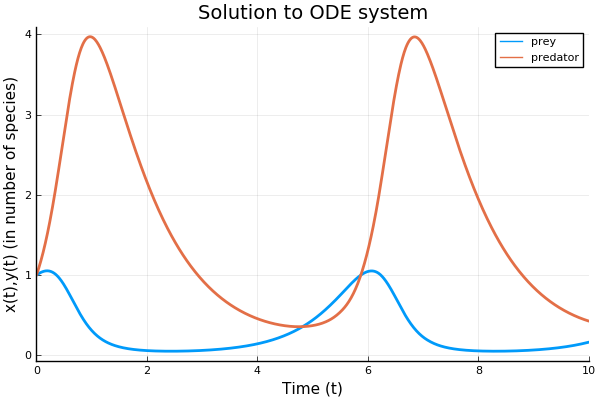

In [5]:
plot(sol,linewidth=2,title="Solution to ODE system",
xaxis="Time (t)",yaxis="x(t),y(t) (in number of species)",label=["prey" "predator"])

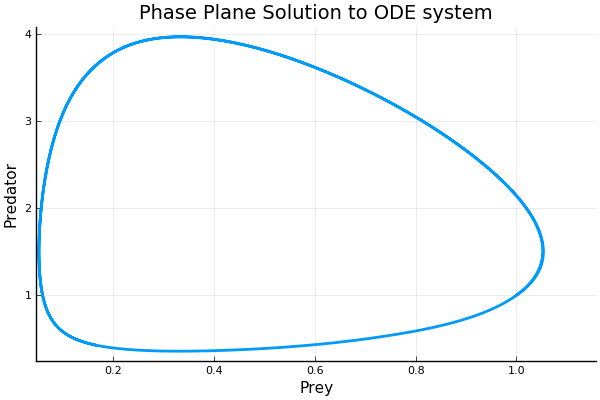

In [6]:
plot(sol,vars=(1,2),linewidth=2,title="Phase Plane Solution to ODE system",
xaxis="Prey",yaxis="Predator",legend=false)

We can "fill in" the phase plane with trajectories corresponding to many different initial values. 

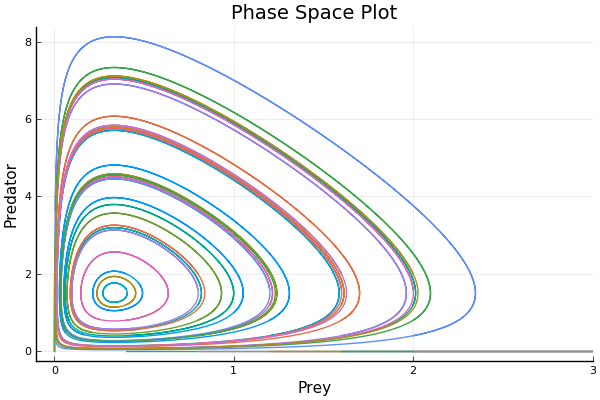

In [7]:
p = plot(sol,vars = (1,2), xlims = (-0.1,3), title = "Phase Space Plot", xaxis = "Prey", yaxis = "Predator", leg=false)
function phase_plot(prob, u0, parms, p, tspan=10.0)
    _prob = ODEProblem(prob.f,u0,(0.0,tspan),parms)
    sol = solve(_prob,Vern9()) # Use Vern9 solver for higher accuracy
    plot!(p,sol,vars = (1,2), xlims = nothing, ylims = nothing)
end
for i in 0.:0.4:2.0
    for j in 0.:0.4:2.0
        phase_plot(prob, [j,i],[1.5,1.0,3.0,1.0],p)
    end
end
plot(p,xlims = (-0.1,3))